In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [42]:
# device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu") # for macos
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # for windows

In [43]:
device

device(type='cuda', index=0)

In [7]:
train_dataset = torchvision.datasets.FashionMNIST("data-files/FashionMNIST", 
                                                  download=True, 
                                                  transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("data-files/FashionMNIST", 
                                                 download=True, train=False,
                                                 transform=transforms.Compose([transforms.ToTensor()]))

100.0%


Extracting data-files/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to data-files/FashionMNIST\FashionMNIST\raw



100.0%


Extracting data-files/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data-files/FashionMNIST\FashionMNIST\raw



100.0%


Extracting data-files/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data-files/FashionMNIST\FashionMNIST\raw



100.0%

Extracting data-files/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data-files/FashionMNIST\FashionMNIST\raw



In [12]:
# dataset으로부터 데이터를 읽어서 모델에 전달하는 도구
train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

2
torch.Size([1, 28, 28]) 9


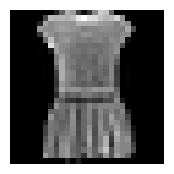

In [34]:
print( len(train_dataset[0]) )
print( train_dataset[0][0].shape, train_dataset[0][1] )

plt.figure(figsize=(2, 2))
plt.imshow(train_dataset[3][0][0], cmap='gray')
plt.axis('off')
plt.show()

In [37]:
class FashionMnistDNN(nn.Module): # nn.Module : pytorch의 모델 기본형
    def __init__(self):
        # super.__init__()
        super(FashionMnistDNN, self).__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)

    def forward(self, input_data): # 네트워크 실행시에 호출되는 함수
        out = input_data.view(-1, 28*28)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        return out
    

In [45]:
learning_rate = 0.001
model = FashionMnistDNN()
model.to(device) # 연산 메모리 영역에 변수 할당

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print(model)

FashionMnistDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [46]:
epochs = 10

for epoch in np.arange(epochs):
    for images, labels in train_loader:
        X, y = images.to(device), labels.to(device) # 연산 메모리 영역에 변수 할당

        outputs = model(X)
        l = loss(outputs, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step() # 가중치 갱신

In [57]:
correct_count = 0
total_count = 0
for images, labels in test_loader:
    X, y = images.to(device), labels.to(device) # 연산 메모리 영역에 변수 할당
    outputs = model(X)

    # print( torch.max(outputs, 1)[1] ) # 예측 값
    predictions = torch.max(outputs, 1)[1]
    # print(y)
    # print(predictions == y)
    # print( (predictions == y).sum() )
    correct_count += (predictions == y).sum()
    total_count += len(y)

# outputs.shape, outputs[:3]
    
print(f"test accuracy : {correct_count / total_count}")

test accuracy : 0.877299964427948
